<a href="https://www.kaggle.com/code/gustawohler/wine-quality-ml?scriptVersionId=93754924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# checking possible accuracy of various ML models that is: decision trees, random forest, adaboost, gradient boosting machines, neural network,
# naive bayes and support vector machines
# first with simplified results - turning ratings >5 into good and others into bad

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

wine_attr = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv', delimiter=',')
wine_attr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
print('Number of attributes (with quality): ' + str(len(wine_attr.columns)))
print('\nChecking if attributes has any NaN values:')
print(pd.isna(wine_attr).any())

Number of attributes (with quality): 12

Checking if attributes has any NaN values:
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


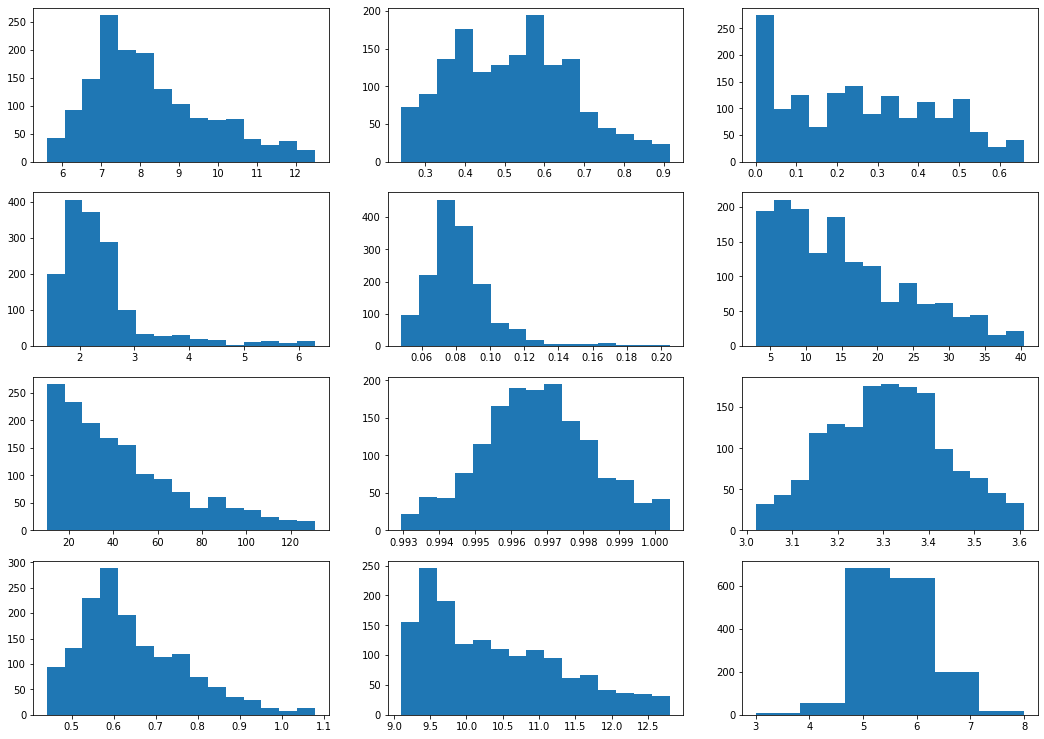

In [3]:
columns_len = 3
rows_len = 4
fig, ax = plt.subplots(rows_len, columns_len, figsize=(18,13))

col_index = 0
for i in range(rows_len):
    for j in range(columns_len):
        wanted_column = wine_attr.columns[col_index]
        wanted_series = wine_attr[wanted_column]
        if wanted_column != 'quality':
            wanted_series_wo_outliners = wanted_series[wanted_series.between(wanted_series.quantile(.025), wanted_series.quantile(.975))]
            ax[i,j].hist(wanted_series_wo_outliners, bins=15)
        else:
            ax[i,j].hist(wanted_series, bins=wanted_series.nunique())
#         wine_attr.hist(column=wine_attr.columns[col_index], ax=ax[i,j], bins=40)
        col_index += 1

In [4]:
#As you can see in above histograms distribution of values for most of attributes in this dataset is not gaussian

<AxesSubplot:>

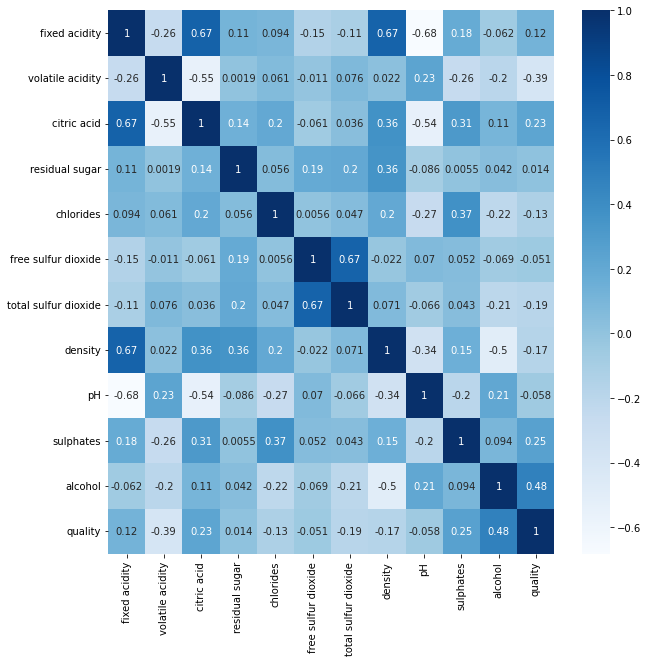

In [5]:
wine_corr = wine_attr.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(wine_corr, xticklabels=wine_corr.columns, yticklabels=wine_corr.columns, annot=True, ax=ax, cmap='Blues')

In [6]:
#There are no strong correlations between attributes. There are some close to 0.7 or -0.7 though

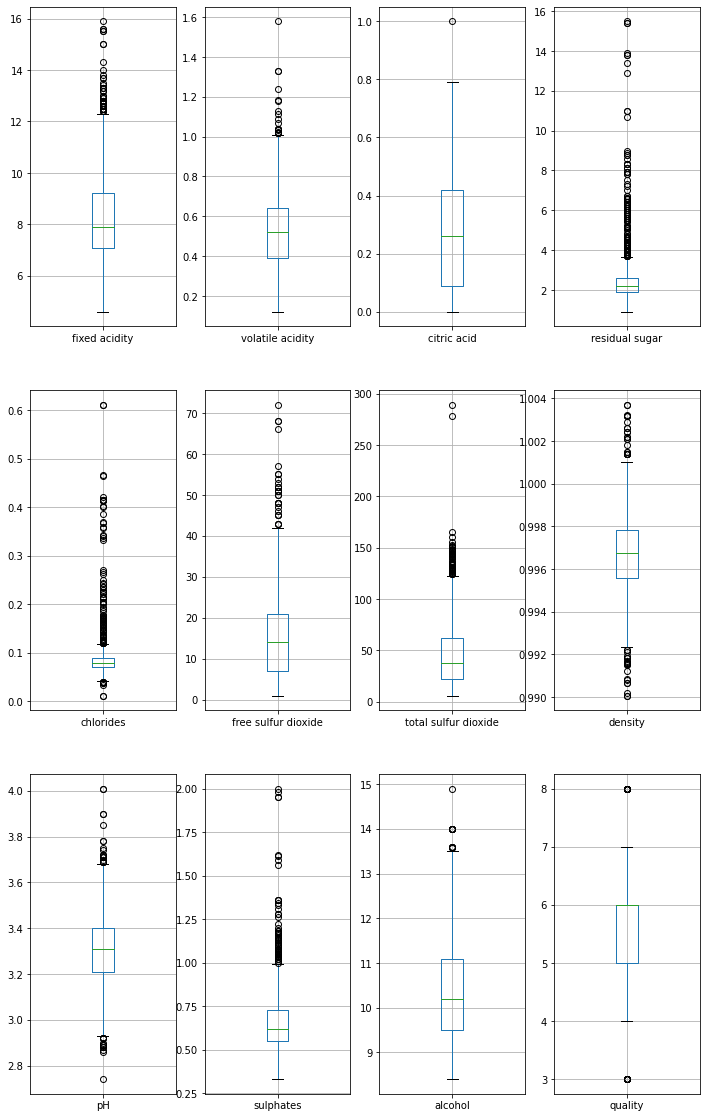

In [7]:
columns_len = 4
rows_len = 3
fig, ax = plt.subplots(rows_len, columns_len, figsize=(12,20))

col_index = 0
for i in range(rows_len):
    for j in range(columns_len):
        wine_attr.boxplot(column=wine_attr.columns[col_index], ax=ax[i,j])
        col_index += 1

In [8]:
# We can see some outliners in every attribute - they are strongly visible in residual sugar, chlorides and sulphates.
# Thus we can't use MinMaxScaling for algorithms which needs that.

In [9]:
# Choosed to simplify quality over 5 as good and equal or below as bad despite recommendation to classify 6 or lower as bad
# because it had too much of class imbalance
wine_attr['quality_simpl'] = wine_attr['quality'].map(lambda x: 'Good' if x>5 else 'Bad')
wine_simpl = wine_attr.drop('quality', axis=1)
wine_simpl.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_simpl
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


(array([744.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

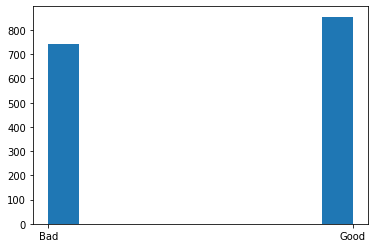

In [10]:
plt.hist(wine_simpl['quality_simpl'])

In [11]:
x = wine_simpl.drop('quality_simpl', axis=1)
y = wine_simpl['quality_simpl']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(classification_report(y_test, dtc.predict(x_test)))

              precision    recall  f1-score   support

         Bad       0.79      0.72      0.76       149
        Good       0.78      0.83      0.80       171

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

         Bad       0.83      0.85      0.84       149
        Good       0.86      0.85      0.86       171

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



In [14]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
print(classification_report(y_test, abc.predict(x_test)))

              precision    recall  f1-score   support

         Bad       0.80      0.74      0.77       149
        Good       0.79      0.84      0.81       171

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
print(classification_report(y_test, gbc.predict(x_test)))

              precision    recall  f1-score   support

         Bad       0.80      0.81      0.80       149
        Good       0.83      0.82      0.83       171

    accuracy                           0.82       320
   macro avg       0.81      0.82      0.81       320
weighted avg       0.82      0.82      0.82       320



In [16]:
y_binary = y.astype('category')
y_binary = y_binary.cat.rename_categories([0, 1])
y_train_binary, y_test_binary = y_binary[y_train.index], y_binary[y_test.index]

In [17]:
#scaling data for NN and SVM - RobustScaler was used because data contains outliners
from sklearn.preprocessing import RobustScaler

def get_scaled_attr(x_train, x_test):
    scaler = RobustScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = get_scaled_attr(x_train, x_test)

In [18]:
from tensorflow import keras
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def get_default_nn_model():
    inputs = tf.keras.Input(shape=(len(x_train.columns),))
    hidden = tf.keras.layers.Dense(8, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal)(inputs)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
    model = tf.keras.Model(inputs=inputs, outputs = outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
    return model

basic_nn_model = get_default_nn_model()
basic_nn_model.fit(x_train_scaled, y_train_binary, batch_size=16, epochs=200, verbose=0, shuffle=True, validation_split=0.15,
                                   callbacks=[EarlyStopping(patience=10, monitor='val_loss', mode='min'),
                                              ModelCheckpoint('./tmp/default_model_checkpoint', save_best_only=True, save_weights_only=True,
                                                                 monitor='val_accuracy', mode='max')])

basic_nn_model.load_weights('./tmp/default_model_checkpoint')

test_results = np.rint(basic_nn_model.predict(x_test_scaled))
print(classification_report(y_test_binary, test_results, target_names=['Bad', 'Good']))

2022-04-23 00:28:19.807195: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-23 00:28:19.965339: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


              precision    recall  f1-score   support

         Bad       0.82      0.72      0.77       149
        Good       0.78      0.86      0.82       171

    accuracy                           0.80       320
   macro avg       0.80      0.79      0.79       320
weighted avg       0.80      0.80      0.80       320



In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(classification_report(y_test, gnb.predict(x_test)))

              precision    recall  f1-score   support

         Bad       0.77      0.74      0.76       149
        Good       0.78      0.81      0.80       171

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled, y_train)
print(classification_report(y_test, svc.predict(x_test_scaled)))

              precision    recall  f1-score   support

         Bad       0.78      0.79      0.78       149
        Good       0.82      0.80      0.81       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [21]:
from sklearn.metrics import accuracy_score

acc_dicts = {}
acc_dicts['decision_tree'] = accuracy_score(y_test, dtc.predict(x_test))
acc_dicts['random_forest'] = accuracy_score(y_test, rfc.predict(x_test))
acc_dicts['ada_boost'] = accuracy_score(y_test, abc.predict(x_test))
acc_dicts['gradient_boost'] = accuracy_score(y_test, gbc.predict(x_test))
acc_dicts['neural_network'] = accuracy_score(y_test_binary, test_results)
acc_dicts['naive_bayes'] = accuracy_score(y_test, gnb.predict(x_test))
acc_dicts['svc'] = accuracy_score(y_test, svc.predict(x_test_scaled))

In [22]:
def get_ylim(plotted_values):
    std_margin = 2
    min_value = np.min(plotted_values)
    max_value = np.max(plotted_values)
    value_std = np.std(plotted_values)
    return [min_value - std_margin*value_std, max_value + std_margin*value_std]

<BarContainer object of 7 artists>

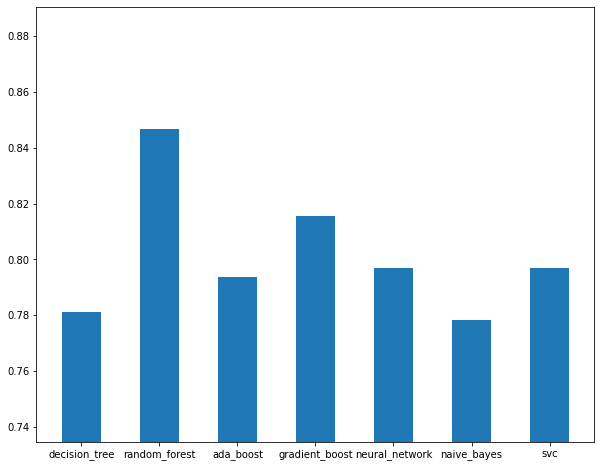

In [23]:
import matplotlib.pyplot as plt

acc_list = list(acc_dicts.values())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_ylim(get_ylim(acc_list))
ax.bar(acc_dicts.keys(), acc_dicts.values(), 0.5)

In [24]:
kfold_scores = {key:0.0 for key in acc_dicts.keys()}

In [25]:
#from above comparision random forest seems the best option for given dataset. Let's see if using stratified k-fold for validation performance changes anything
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=4,random_state=8)

dtc_kfold = DecisionTreeClassifier()
kfold_scores['decision_tree'] = cross_val_score(dtc_kfold, x,y,scoring='accuracy', cv=cv, n_jobs=-1)

In [26]:
rfc_kfold = RandomForestClassifier(n_jobs=-1)
kfold_scores['random_forest'] = cross_val_score(rfc_kfold, x,y,scoring='accuracy', cv=cv, n_jobs=-1)

In [27]:
abc_kfold = AdaBoostClassifier()
kfold_scores['ada_boost'] = cross_val_score(abc_kfold, x,y,scoring='accuracy', cv=cv, n_jobs=-1)

In [28]:
gbc_kfold = GradientBoostingClassifier()
kfold_scores['gradient_boost'] = cross_val_score(gbc_kfold, x,y,scoring='accuracy', cv=cv, n_jobs=-1)

In [29]:
def nn_cross_val_score(model, x, y, batch_size=16, epochs=200):
    nn_acc_scores=[]
    for train_index, test_index in cv.split(x, y):
        x_train_scaled, x_test_scaled = get_scaled_attr(x.iloc[train_index], x.iloc[test_index])
        k_fold_y_train = y[train_index] if y.nunique() <= 2 else pd.get_dummies(y[train_index])
        k_fold_y_test = y[test_index] if y.nunique() <= 2 else pd.get_dummies(y[test_index])

        model.fit(x_train_scaled, k_fold_y_train, batch_size=batch_size, epochs=epochs, verbose=0, shuffle=True, validation_split=0.15,
                           callbacks=[EarlyStopping(patience=10, monitor='val_loss', mode='min'),
                                      ModelCheckpoint('./tmp/kfold_model_checkpoint', save_best_only=True, save_weights_only=True,
                                                         monitor='val_accuracy', mode='max')])

        model.load_weights('./tmp/kfold_model_checkpoint')

        acc_score = model.evaluate(x_test_scaled, k_fold_y_test, verbose=0)[model.metrics_names.index('accuracy')]
        nn_acc_scores.append(acc_score)
    return nn_acc_scores

In [30]:
kfold_scores['neural_network'] = nn_cross_val_score(get_default_nn_model(), x, y_binary)

In [31]:
gnb_kfold = GaussianNB()
kfold_scores['naive_bayes'] = cross_val_score(gnb_kfold, x,y,scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
def svc_cross_val_score(model, x, y):
    svc_acc_scores=[]
    for train_index, test_index in cv.split(x, y):
        x_train_scaled, x_test_scaled = get_scaled_attr(x.iloc[train_index], x.iloc[test_index])

        model.fit(x_train_scaled, y[train_index])

        acc_score = accuracy_score(y[test_index], model.predict(x_test_scaled))
        svc_acc_scores.append(acc_score)
    return svc_acc_scores
    
kfold_scores['svc'] = svc_cross_val_score(SVC(), x, y)

In [33]:
def plot_two_bars(plotted_values, labels, x_ticks=list(acc_dicts.keys()), y_label='', title=''):
    x_placement = np.arange(plotted_values[0].shape[0])
    width = 0.3
    
    fig = plt.figure(figsize=(10,8))

    ax = plt.subplot(111)
    ax.set_ylim(get_ylim(np.stack([plotted_values[0], plotted_values[1]])))
    ax.bar(x_placement - 0.6 * width, plotted_values[0], width=width, color='b', align='center', label=labels[0])
    ax.bar(x_placement + 0.6 * width, plotted_values[1], width=width, color='g', align='center', label=labels[1])
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    ax.bar_label(ax.containers[1], label_type='edge', fmt='%.2f')
    ax.set_xticks(x_placement, x_ticks)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

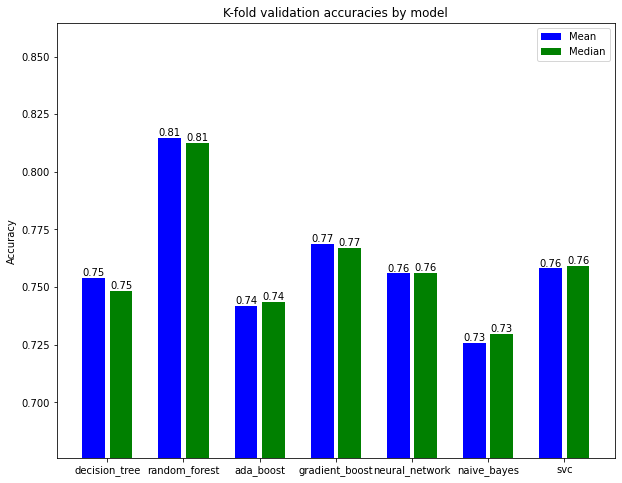

In [34]:
np_kfold = np.array(list(kfold_scores.values()))
np_kfold_mean = np.mean(np_kfold, axis=1)
np_kfold_median = np.median(np_kfold, axis=1)

plot_two_bars([np_kfold_mean, np_kfold_median], ['Mean', 'Median'], y_label='Accuracy', title='K-fold validation accuracies by model')

# x_placement = np.arange(np_kfold_mean.shape[0])
# width = 0.3

# fig = plt.figure(figsize=(10,8))

# ax = plt.subplot(111)
# ax.set_ylim(get_ylim(np.stack([np_kfold_mean, np_kfold_median])))
# ax.bar(x_placement - 0.6 * width, np_kfold_mean, width=width, color='b', align='center', label='Mean')
# ax.bar(x_placement + 0.6 * width, np_kfold_median, width=width, color='g', align='center', label='Median')
# ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
# ax.bar_label(ax.containers[1], label_type='edge', fmt='%.2f')
# ax.set_xticks(x_placement, list(acc_dicts.keys()))
# ax.set_ylabel('Accuracy')
# ax.set_title('K-fold validation accuracies by model')
# ax.legend()

In [35]:
# We can see in figure above that random forest is outperforming other ML models (as shown also in earlier). In next step I will check performance of those models
# after hyperparameters tuning

Number of leaves in default decision tree: 214


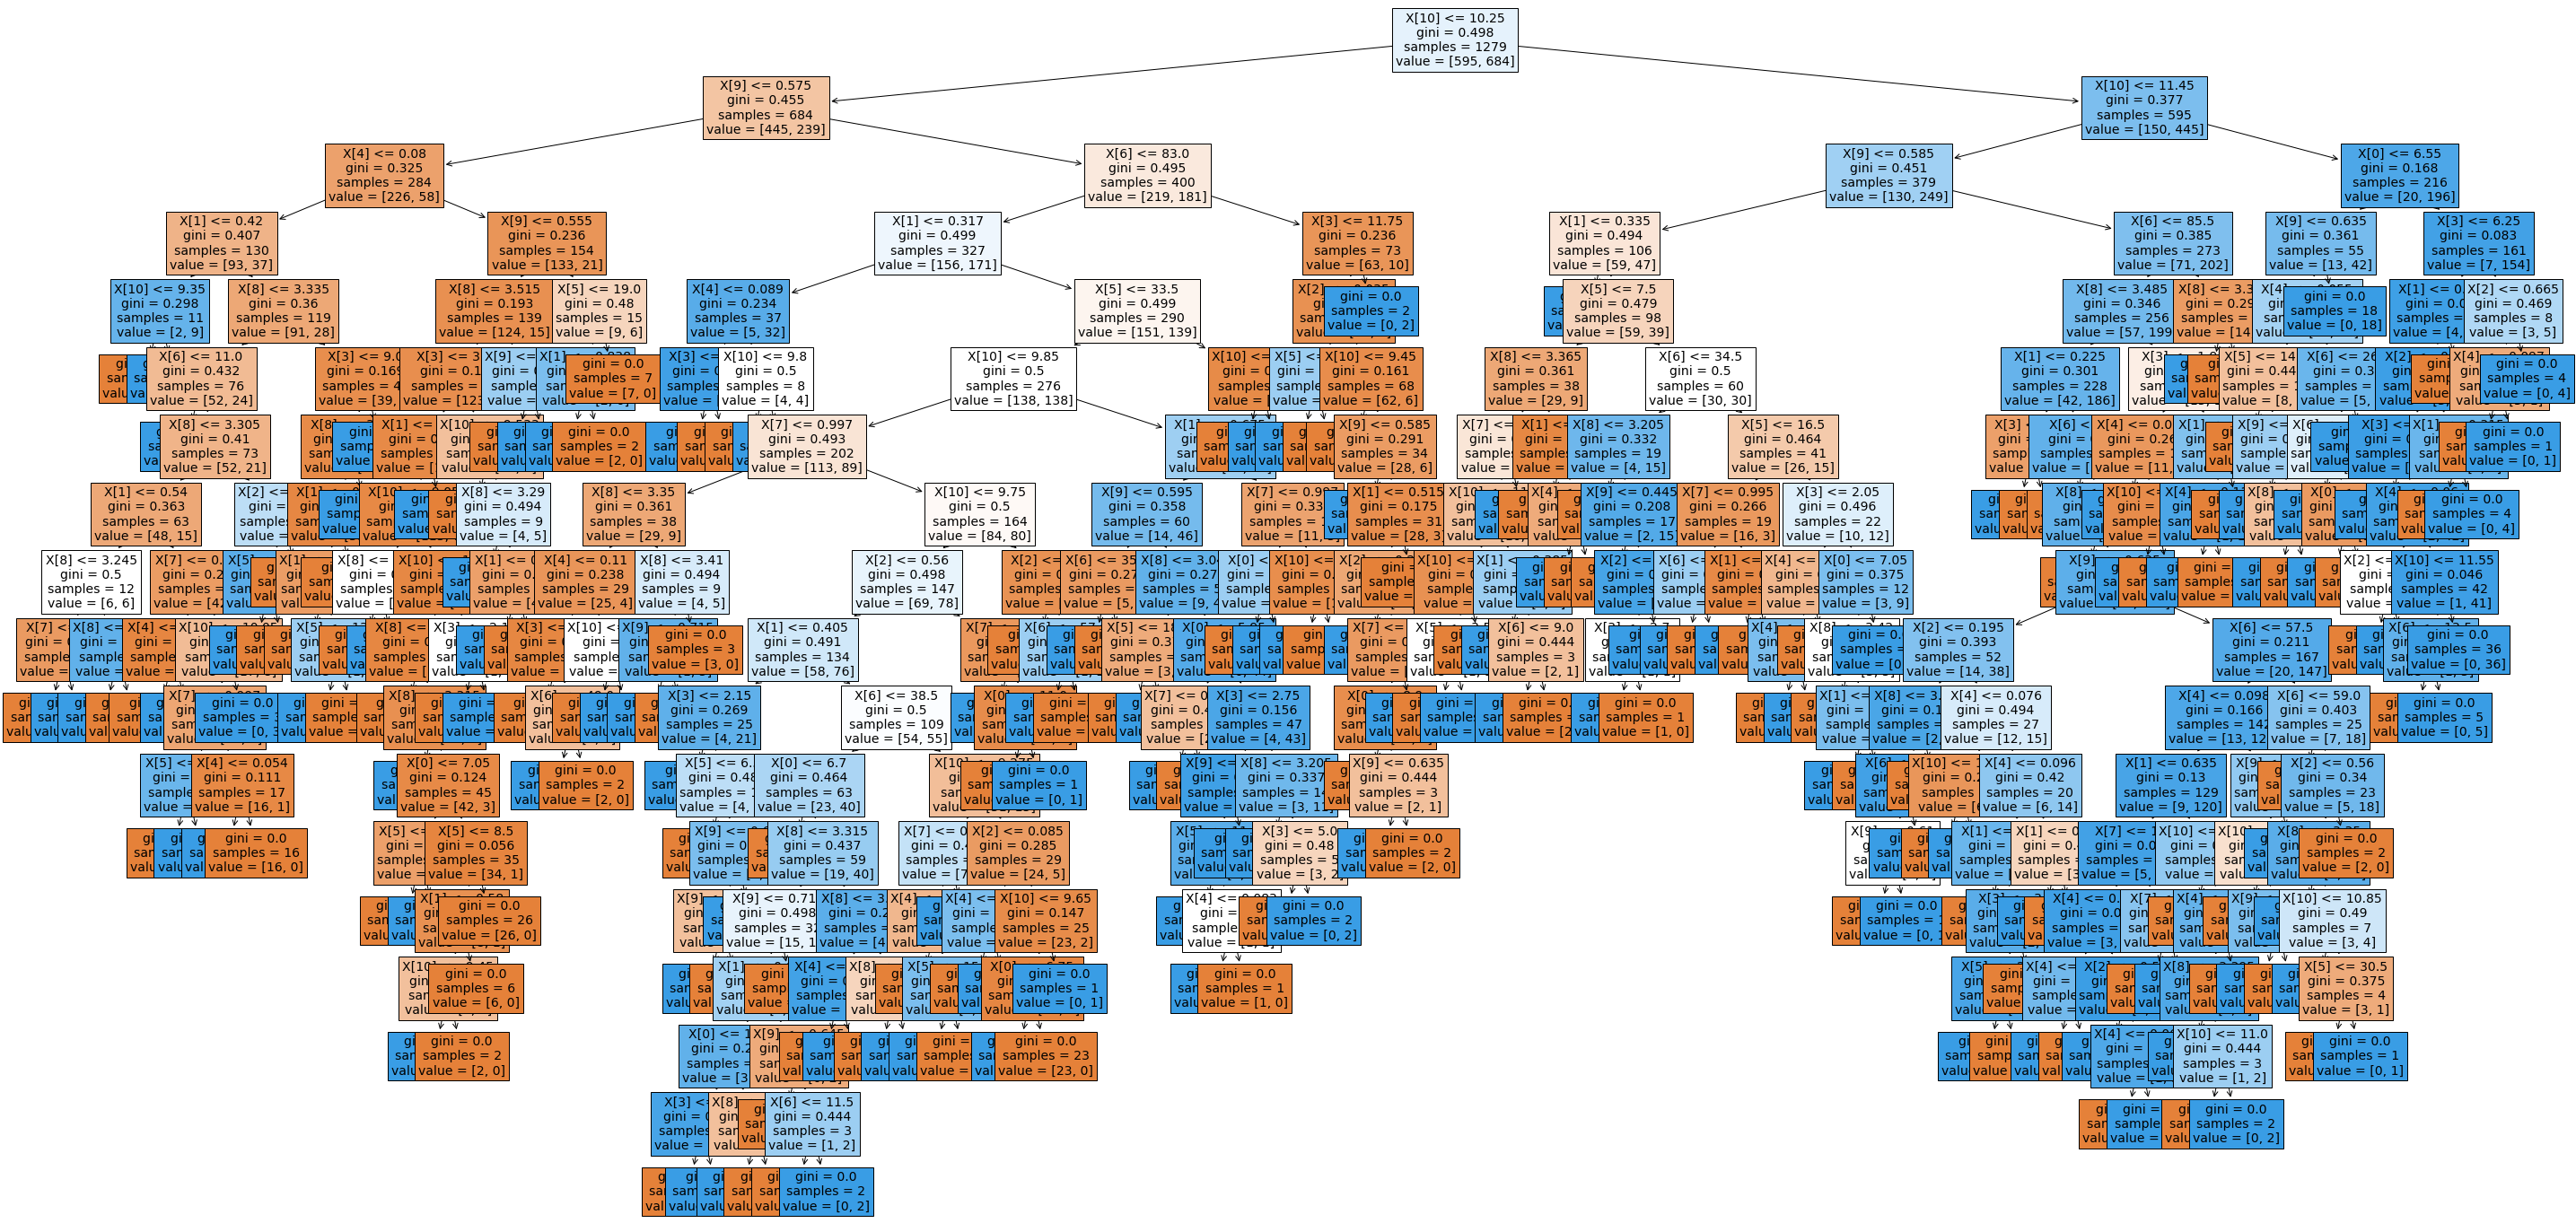

In [36]:
from sklearn.tree import plot_tree

# Let's get some intuition about size of default decision tree
print('Number of leaves in default decision tree: ' + str(dtc.get_n_leaves()))
plt.figure(figsize=(50,25))
plot_tree(dtc, filled=True, fontsize=14)
plt.show()

In [37]:
# Hyperparameter tuning for each model will be conducted with random search and will search through 100 combinations to get best result
from sklearn.model_selection import RandomizedSearchCV
ht_iterations = 100
ht_scores = {key:0.0 for key in acc_dicts.keys()}

In [38]:
max_depth_arr = np.arange(3,20,3).tolist()
max_leaf_arr = np.arange(25, 400, 25).tolist()
max_depth_arr.append(None)
max_leaf_arr.append(None)
dtc_ht = DecisionTreeClassifier()
search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth_arr,
#     those parameters turned out to give best performance when left with default values
#     'min_samples_split': np.arange(2,40),
#     'min_impurity_decrease': np.arange(0.0, 0.5, 0.075),
#     'ccp_alpha': np.arange(0.0, 0.2, 0.01),
    'max_leaf_nodes': max_leaf_arr
}
                  
ht_rs_dtc = RandomizedSearchCV(dtc_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_dtc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_dtc.best_score_)  + ' and they are following: \n' + str(ht_rs_dtc.best_params_))
ht_scores['decision_tree'] = ht_rs_dtc.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.7575019592476488 and they are following: 
{'max_leaf_nodes': 125, 'max_depth': 15, 'criterion': 'gini'}


In [39]:
rfc_ht = RandomForestClassifier(n_jobs=-1)
search_space = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': max_depth_arr,
    'max_leaf_nodes': max_leaf_arr
}
                  
ht_rs_rfc = RandomizedSearchCV(rfc_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_rfc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_rfc.best_score_)  + ' and they are following: \n' + str(ht_rs_rfc.best_params_))
ht_scores['random_forest'] = ht_rs_rfc.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.8172247257053291 and they are following: 
{'n_estimators': 450, 'max_leaf_nodes': 375, 'max_depth': 18, 'criterion': 'entropy'}


In [40]:
abc_ht = AdaBoostClassifier()
search_space = {
    'n_estimators': np.arange(25, 251, 25),
    'learning_rate': np.arange(0.1, 2.5, 0.1),
}

ht_rs_abc = RandomizedSearchCV(abc_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_abc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_abc.best_score_)  + ' and they are following: \n' + str(ht_rs_abc.best_params_))
ht_scores['ada_boost'] = ht_rs_abc.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.7540683777429467 and they are following: 
{'n_estimators': 250, 'learning_rate': 0.30000000000000004}


In [41]:
gbc_ht = GradientBoostingClassifier()
search_space = {
    'n_estimators': np.arange(25, 251, 25),
    'learning_rate': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'subsample': np.arange(0.1, 1.1, 0.1),
    'max_depth': np.arange(1,5)
}

ht_rs_gbc = RandomizedSearchCV(gbc_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_gbc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_gbc.best_score_)  + ' and they are following: \n' + str(ht_rs_gbc.best_params_))
ht_scores['gradient_boost'] = ht_rs_gbc.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.799717868338558 and they are following: 
{'subsample': 0.9, 'n_estimators': 175, 'max_depth': 4, 'learning_rate': 0.3}


In [42]:
import keras_tuner as kt

# creating custom keras tuner for searching hyperparameters in same manner as in previous algorithms (using k-fold cross-validation)
# by doing this I can also tune batch size
class CVTuner(kt.RandomSearch):
  def run_trial(self, trial, x, y, *args, **kwargs):
    passed_cv = kwargs['cv']
    batch_size = trial.hyperparameters.Choice('batch_size', [8, 16, 32])
    epochs = 200
    val_accs = []
    for train_indices, test_indices in passed_cv.split(x, y):
      x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
      y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
      x_train_scaled, x_test_scaled = get_scaled_attr(x_train, x_test)
      model = self.hypermodel.build(trial.hyperparameters)
        
      model.fit(x_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=0, shuffle=True, validation_split=0.15,
                                   callbacks=[EarlyStopping(patience=10, monitor='val_loss', mode='min'),
                                              ModelCheckpoint('./tmp/ht_model_checkpoint', save_best_only=True, save_weights_only=True,
                                                                 monitor='val_accuracy', mode='max')])
      model.load_weights('./tmp/ht_model_checkpoint')
      val_accs.append(model.evaluate(x_test_scaled, y_test, verbose=0)[model.metrics_names.index('accuracy')])
    self.oracle.update_trial(trial.trial_id, {'val_acc': np.mean(val_accs)})

In [43]:
from tensorflow.python.keras.regularizers import l2

# add conditional scopes
def build_model_for_hp_tune(hp):
    layers_quantity = hp.Int('layers_quantity', 1, 2)
    learning_rate = hp.Float('learning_rate', 1e-6, 1e-2, sampling='log')
    regularize_factor = hp.Float('regularization_factor', 1e-10, 1e-2, sampling='log')

    inputs = tf.keras.Input(shape=(len(x_train.columns),))
    for i in range(layers_quantity):
        num_of_neurons = hp.Choice(f'number_of_neurons_{i}_layer', [4, 8, 16])
        if i == 0:
            hidden = tf.keras.layers.Dense(num_of_neurons, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(),
                                           kernel_regularizer=l2(regularize_factor),
                                           bias_regularizer=l2(regularize_factor))(inputs)
        else:
            hidden = tf.keras.layers.Dense(num_of_neurons, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal(),
                                           kernel_regularizer=l2(regularize_factor),
                                           bias_regularizer=l2(regularize_factor))(hidden)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
    model = tf.keras.Model(inputs=inputs, outputs = outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [44]:
tuner = CVTuner(build_model_for_hp_tune,
                objective='val_acc',
                max_trials=ht_iterations,
                executions_per_trial=1,
                overwrite=False,
                directory="./",
                project_name="wine_quality")

tuner.search(x, y_binary, cv=cv)
best_nn_trial = tuner.oracle.get_best_trials(1)[0]
print('Best parameters have achieved the score: ' + str(best_nn_trial.score)  + ' and they are following: \n' + str(best_nn_trial.hyperparameters.values))
ht_scores['neural_network'] = best_nn_trial.score

Trial 100 Complete [00h 16m 58s]
val_acc: 0.6161696672439575

Best val_acc So Far: 0.7535932511091232
Total elapsed time: 10h 58m 57s
Best parameters have achieved the score: 0.7535932511091232 and they are following: 
{'layers_quantity': 1, 'learning_rate': 0.004661189499226274, 'regularization_factor': 3.9205614203441994e-09, 'number_of_neurons_0_layer': 16, 'batch_size': 8}


In [45]:
gnb_ht = GaussianNB()
search_space = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

ht_rs_gnb = RandomizedSearchCV(gnb_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_gnb.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_gnb.best_score_)  + ' and they are following: \n' + str(ht_rs_gnb.best_params_))
ht_scores['naive_bayes'] = ht_rs_gnb.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.7266991575235109 and they are following: 
{'var_smoothing': 6.579332246575682e-09}


In [46]:
from sklearn.pipeline import make_pipeline

gamma_list = np.logspace(-4, 1, num=25).tolist()
gamma_list.extend(['scale', 'auto'])

search_space = {
    'svc__C': [0.1, 0.3, 1, 3, 10, 30, 100],
    'svc__gamma': gamma_list
}

svc_pipeline = make_pipeline(RobustScaler(), 
                    SVC())

ht_rs_svc = RandomizedSearchCV(svc_pipeline, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=ht_iterations, verbose=1)
ht_rs_svc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_svc.best_score_)  + ' and they are following: \n' + str(ht_rs_svc.best_params_))
ht_scores['svc'] = ht_rs_svc.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters have achieved the score: 0.77048638322884 and they are following: 
{'svc__gamma': 0.9085175756516871, 'svc__C': 3}


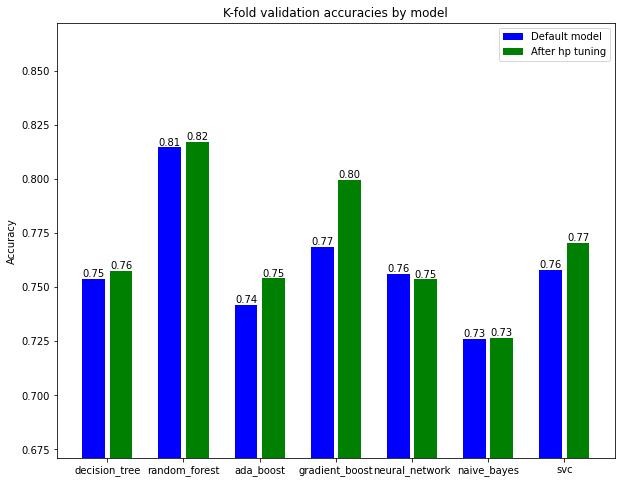

In [47]:
ht_mean = np.array(list(ht_scores.values()))

plot_two_bars([np_kfold_mean, ht_mean], ['Default model', 'After hp tuning'], y_label='Accuracy', title='K-fold validation accuracies by model')

In [48]:
# Now let's once again see accuracies for models with hyperparameters tuned but without grouping reviews into "Bad" and "Good"
# I hope those parameters will be closer to optimum than default ones despite change of target
y_wo_group = wine_attr['quality']

kfold_scores_wo_group = {key:0.0 for key in acc_dicts.keys()}

In [49]:
dtc_wo_group = DecisionTreeClassifier(**ht_rs_dtc.best_params_)
kfold_scores_wo_group['decision_tree'] = cross_val_score(dtc_wo_group, x,y_wo_group, scoring='accuracy', cv=cv, n_jobs=-1)

rfc_kfold_wo_group = RandomForestClassifier(n_jobs=-1,**ht_rs_rfc.best_params_)
kfold_scores_wo_group['random_forest'] = cross_val_score(rfc_kfold_wo_group, x,y_wo_group,scoring='accuracy', cv=cv, n_jobs=-1)

abc_kfold_wo_group = AdaBoostClassifier(**ht_rs_abc.best_params_)
kfold_scores_wo_group['ada_boost'] = cross_val_score(abc_kfold_wo_group, x,y_wo_group,scoring='accuracy', cv=cv, n_jobs=-1)

gbc_kfold_wo_group = GradientBoostingClassifier(**ht_rs_gbc.best_params_)
kfold_scores_wo_group['gradient_boost'] = cross_val_score(gbc_kfold_wo_group, x,y_wo_group,scoring='accuracy', cv=cv, n_jobs=-1)

gnb_kfold_wo_group = GaussianNB(**ht_rs_gnb.best_params_)
kfold_scores_wo_group['naive_bayes'] = cross_val_score(gnb_kfold_wo_group, x,y_wo_group,scoring='accuracy', cv=cv, n_jobs=-1)

kfold_scores_wo_group['svc'] = svc_cross_val_score(SVC(), x, y_wo_group)

In [50]:
#Wziąć najlepsze parametry z poprzedniego modelu
def get_default_nn_model_multi_class():
    inputs = tf.keras.Input(shape=(len(x_train.columns),))
    hidden = tf.keras.layers.Dense(8, activation='relu', kernel_initializer = tf.keras.initializers.HeNormal)(inputs)
    outputs = tf.keras.layers.Dense(y_wo_group.nunique(), activation='sigmoid')(hidden)
    model = tf.keras.Model(inputs=inputs, outputs = outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

kfold_scores_wo_group['neural_network'] = nn_cross_val_score(get_default_nn_model_multi_class(), x, y_wo_group)

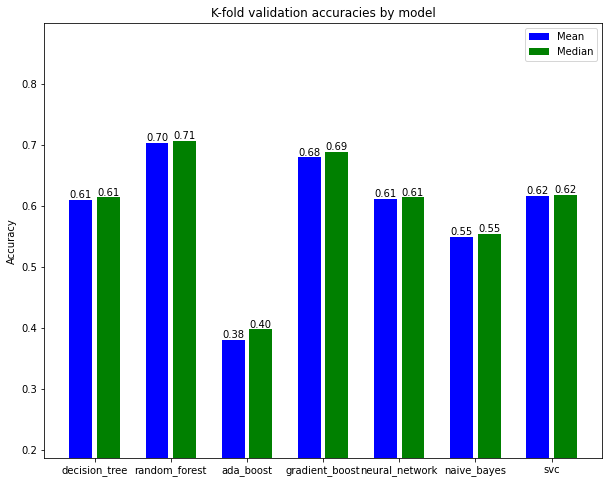

In [51]:
np_kfold_wo_group = np.array(list(kfold_scores_wo_group.values()))
np_kfold_mean_wo_group = np.mean(np_kfold_wo_group, axis=1)
np_kfold_median_wo_group = np.median(np_kfold_wo_group, axis=1)

plot_two_bars([np_kfold_mean_wo_group, np_kfold_median_wo_group], ['Mean', 'Median'], y_label='Accuracy', title='K-fold validation accuracies by model')

In [52]:
rfc_ht = RandomForestClassifier(n_jobs=-1)
search_space = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': max_depth_arr,
    'max_leaf_nodes': max_leaf_arr
}
                  
ht_rs_rfc = RandomizedSearchCV(rfc_ht, search_space, scoring='accuracy', cv=cv, n_jobs=-1, n_iter=150, verbose=1)
ht_rs_rfc.fit(x,y)
print('Best parameters have achieved the score: ' + str(ht_rs_rfc.best_score_)  + ' and they are following: \n' + str(ht_rs_rfc.best_params_))

Fitting 20 folds for each of 150 candidates, totalling 3000 fits
Best parameters have achieved the score: 0.8187926136363636 and they are following: 
{'n_estimators': 300, 'max_leaf_nodes': 175, 'max_depth': 15, 'criterion': 'entropy'}
